In [5]:
import pandas as pd
import networkx as nx

# Get data 
data = pd.read_csv("southern_rail_data.csv").drop('Unnamed: 0', axis=1)

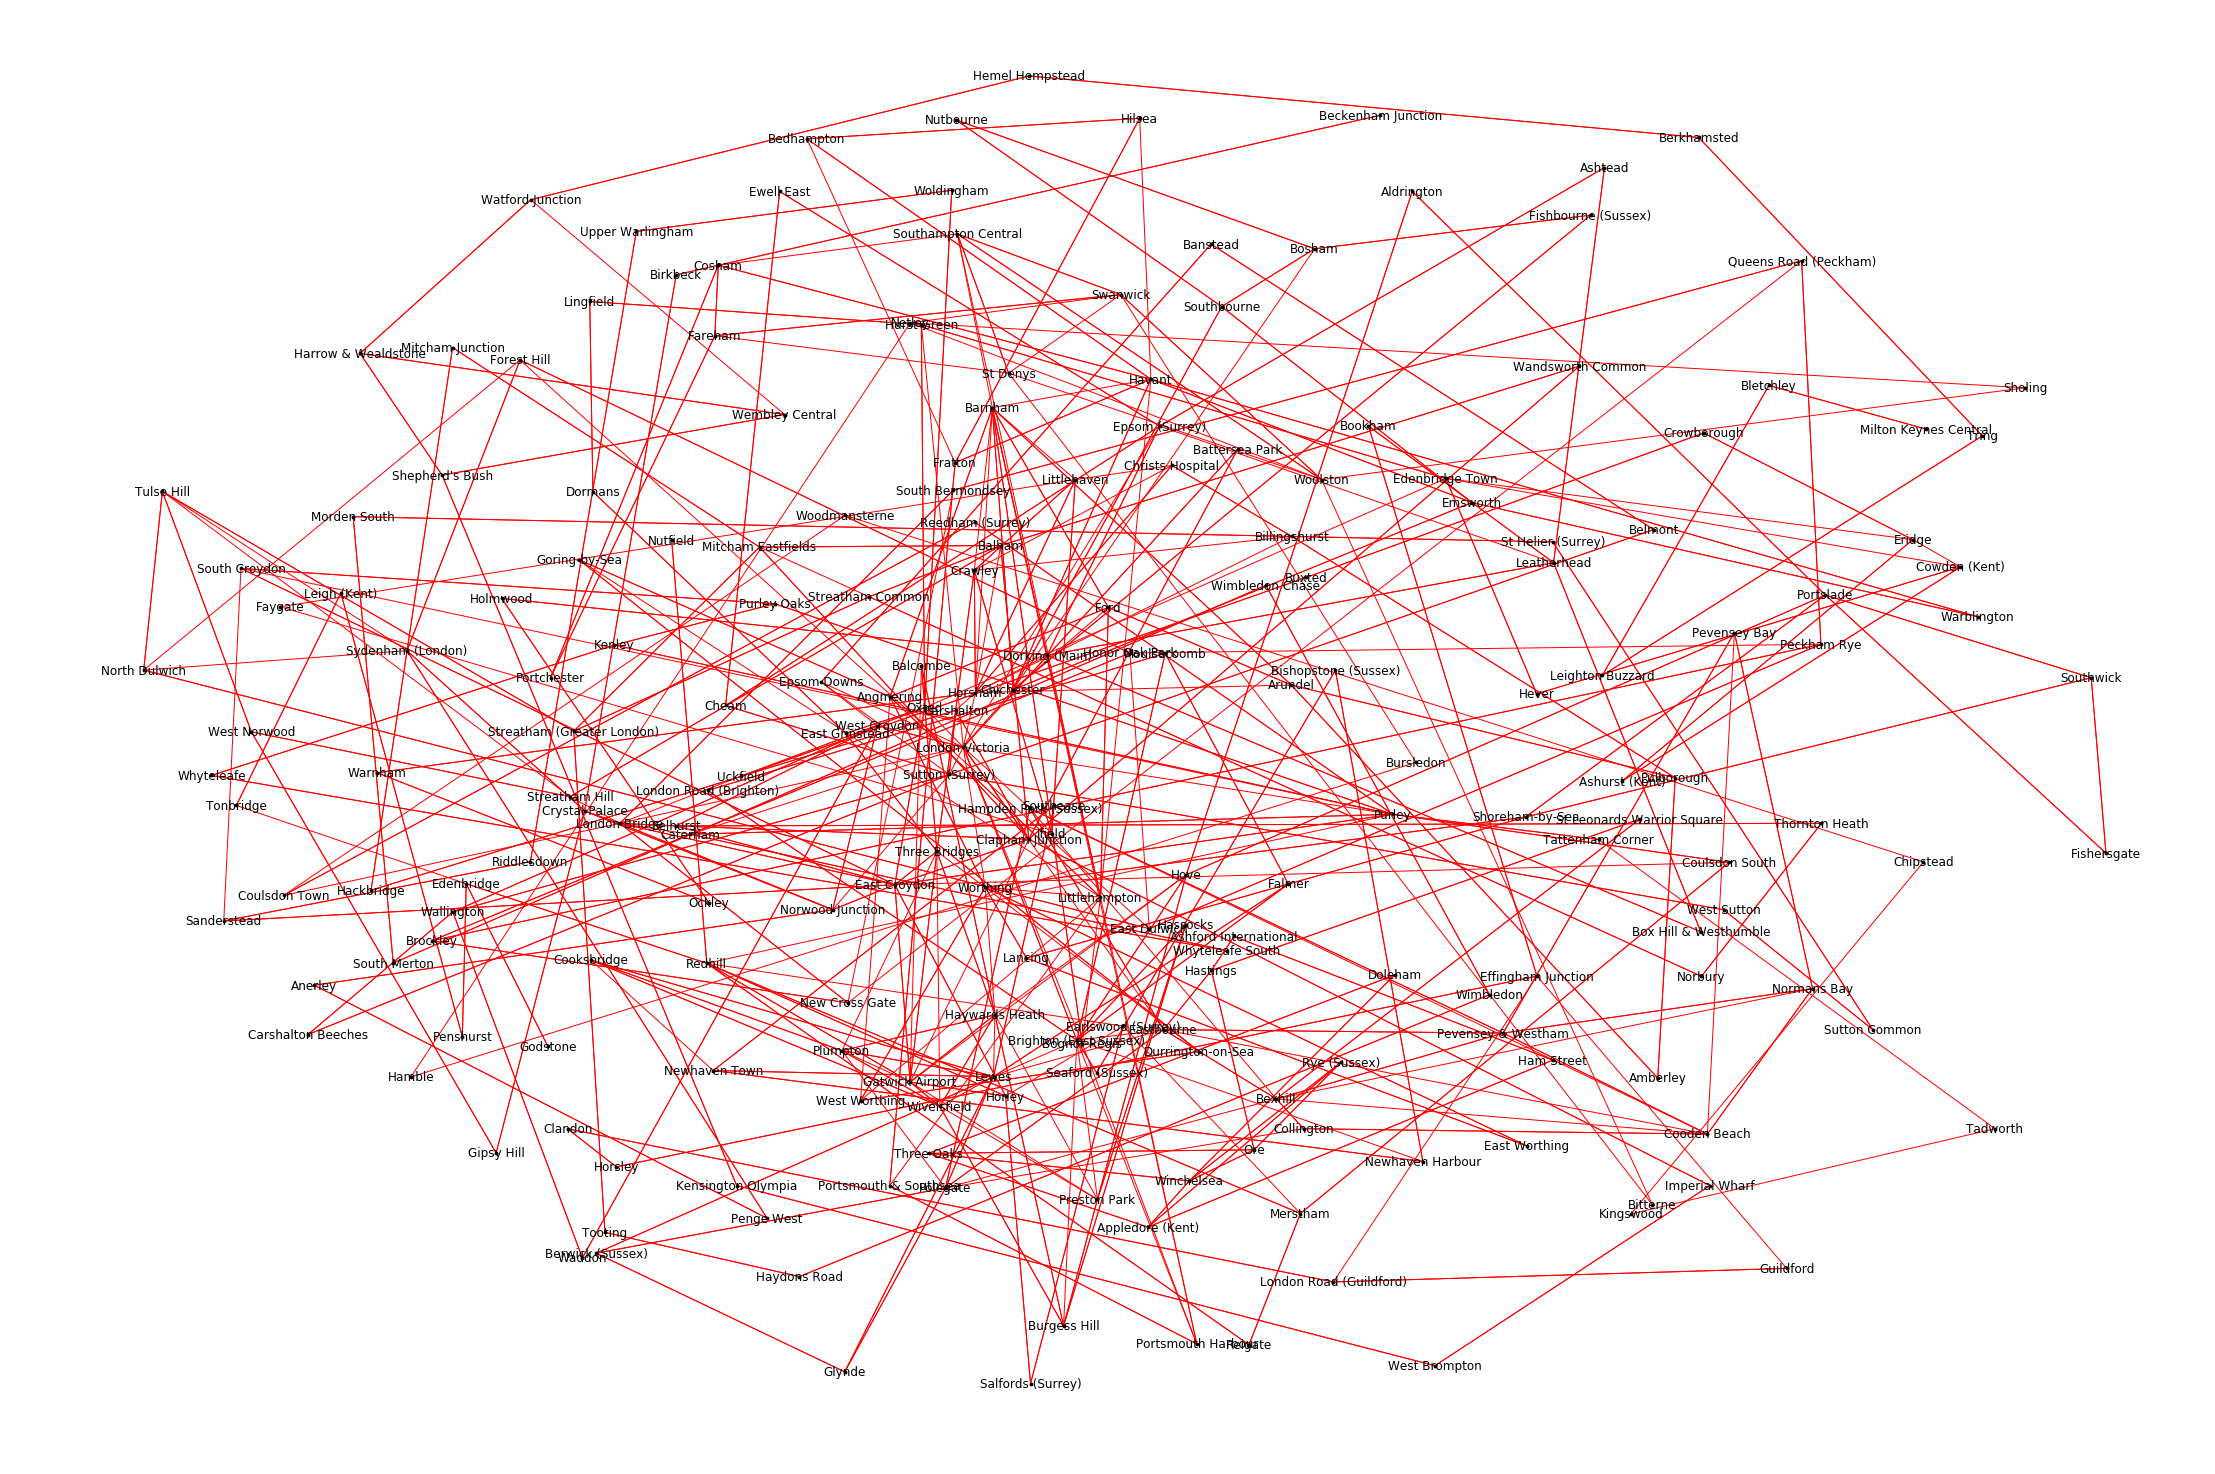

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))

edges = [
    list(row) for row in data[
        ['origin_station_name','destination_station_name', 'time']
    ].values if list(row)[0] != list(row)[1] 
]

nodes = nodes = list(set(data.origin_station_name))

Gr = nx.DiGraph()

for e in edges:
    Gr.add_edge(e[0], e[1], weight=e[2])

nx.draw_spring(Gr,
               with_labels=True,
               arrows=False,
               alpha=1,
               #width= data.time * 10,
               #edge_labels=data.time.values,
               edge_color='r',
               node_label_size=1,
               node_color='black',
               node_size=8)


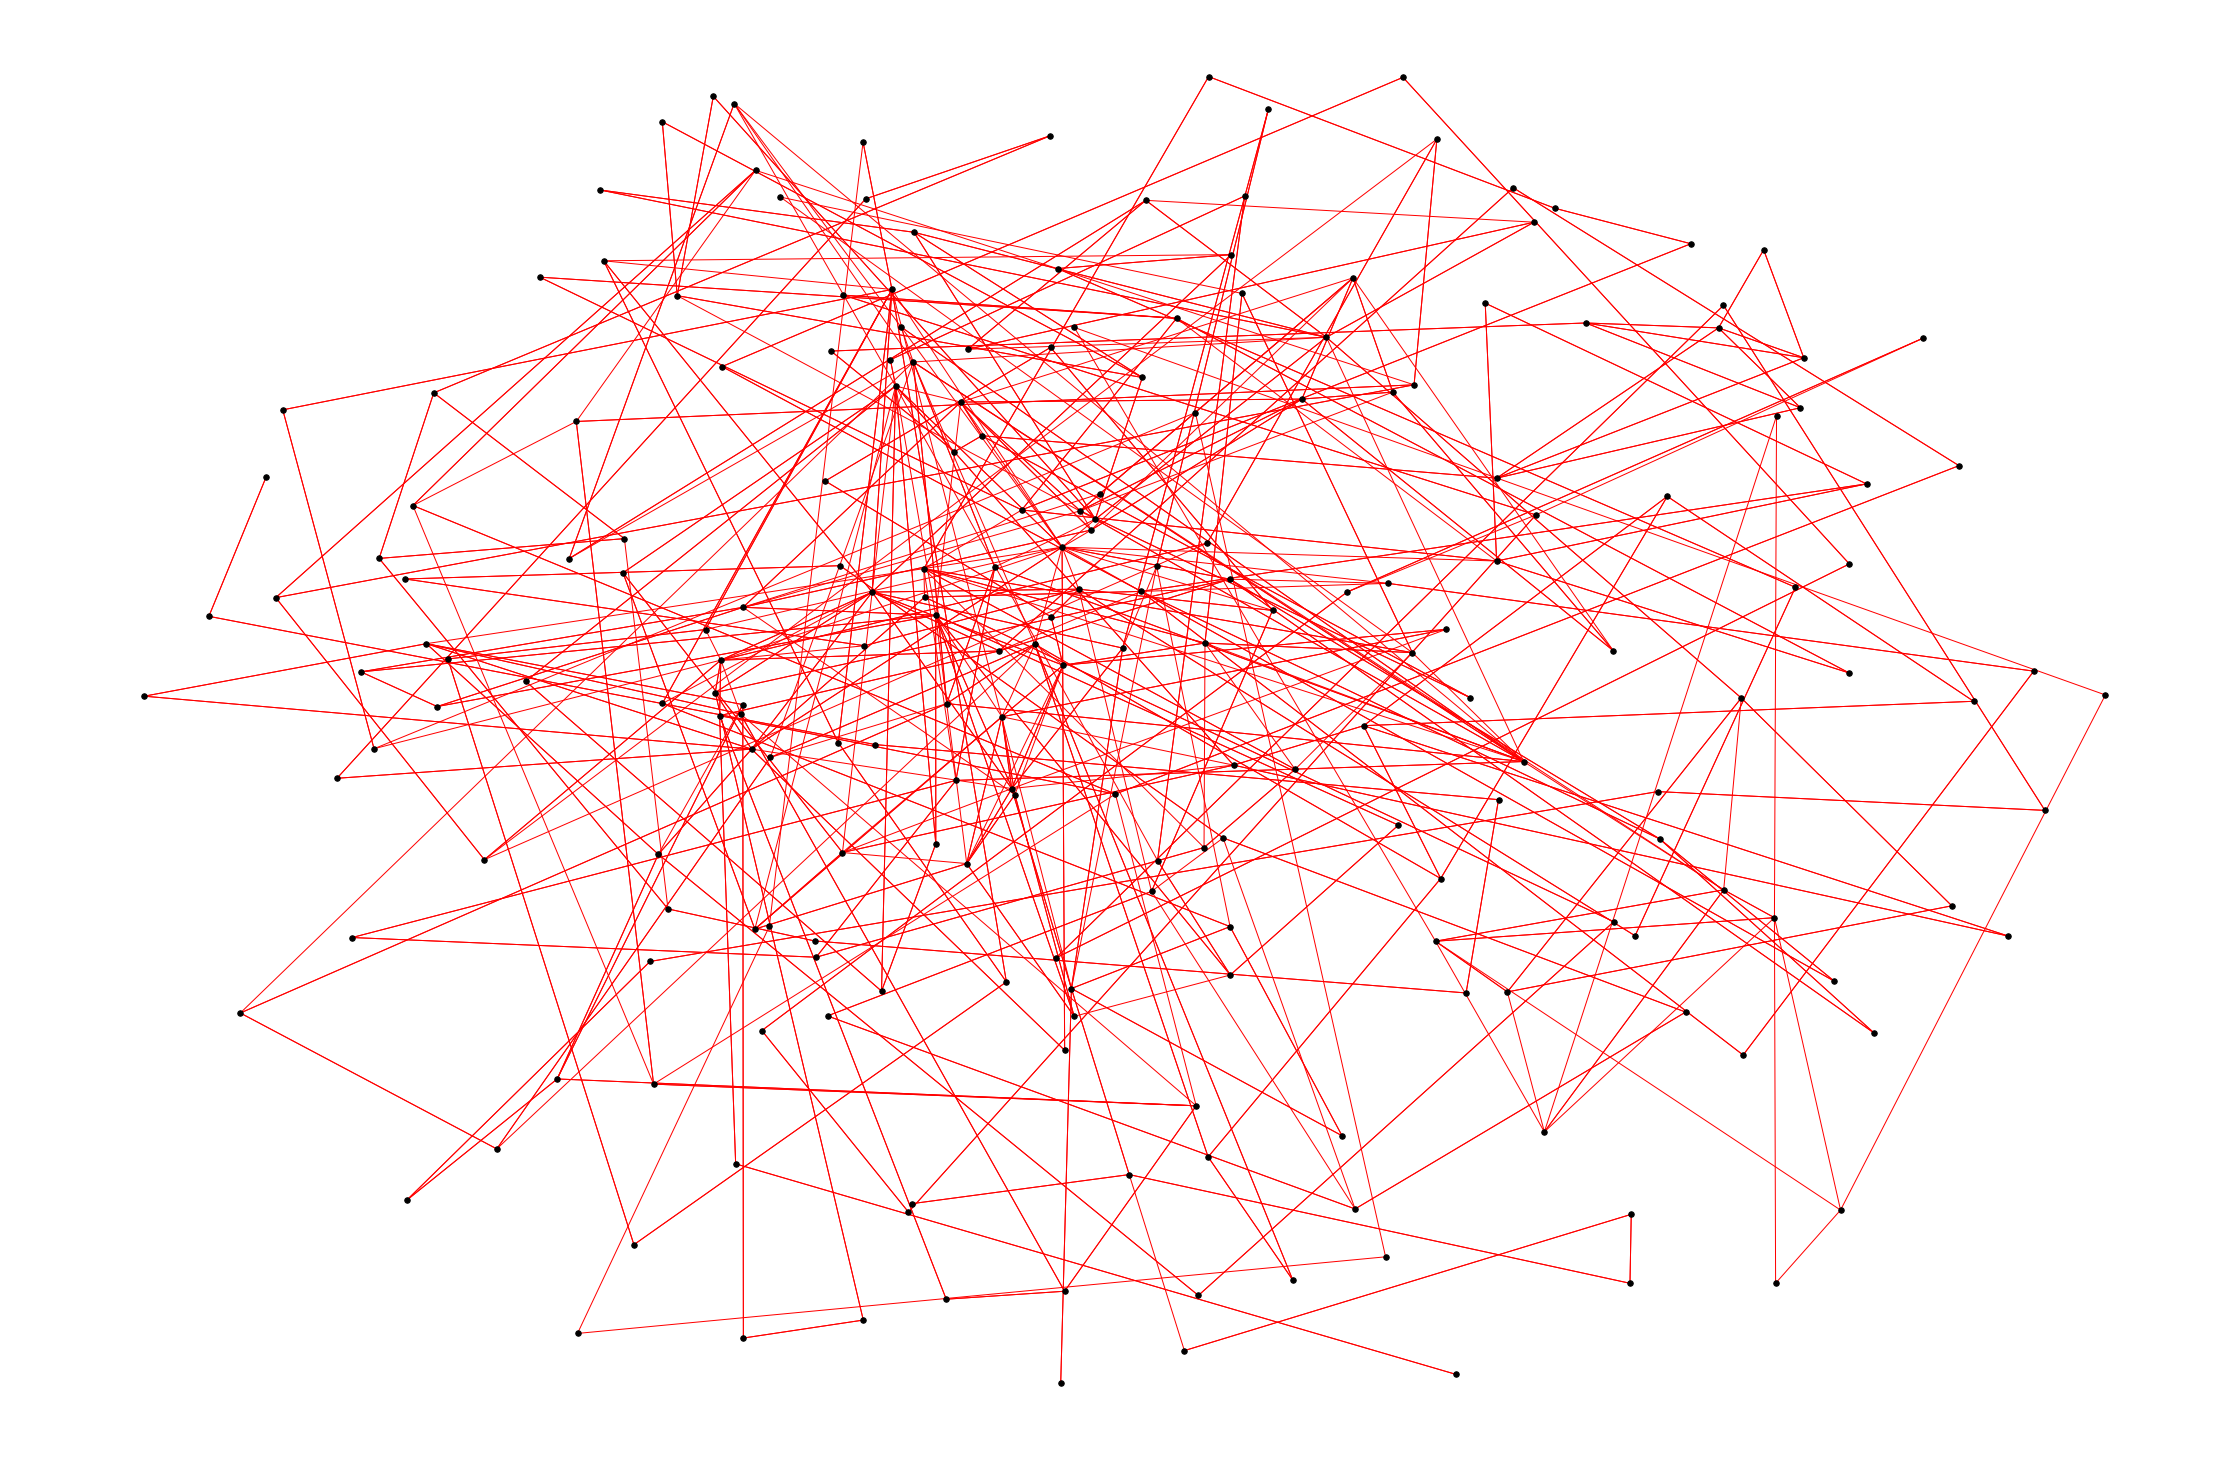

In [56]:
plt.figure(figsize=(30,20))

Gr = nx.DiGraph()

for e in edges:
    Gr.add_edge(e[0], e[1], weight=e[2])

nx.draw_spring(Gr,
               with_labels=False,
               arrows=False,
               alpha=1,
               #width= data.time * 10,
               #edge_labels=data.time.values,
               edge_color='r',
               node_label_size=1,
               node_color='black',
               node_size=30)

In [52]:

clustering_coeffs = nx.clustering(Gr).values()
average_clustering_coeff = sum(clustering_coeffs)/len(clustering_coeffs)

average_clustering_coeff

0.2916362844020653

In [53]:
nx.average_shortest_path_length(Gr)


6.238888190691634

In [60]:
len(list(Gr.nodes))

219

In [62]:
len(list(Gr.edges)) / 219

3

In [63]:
len(list(Gr.edges))

727

avg shortest path 3.18453353441
avg cc 0.0209587723286


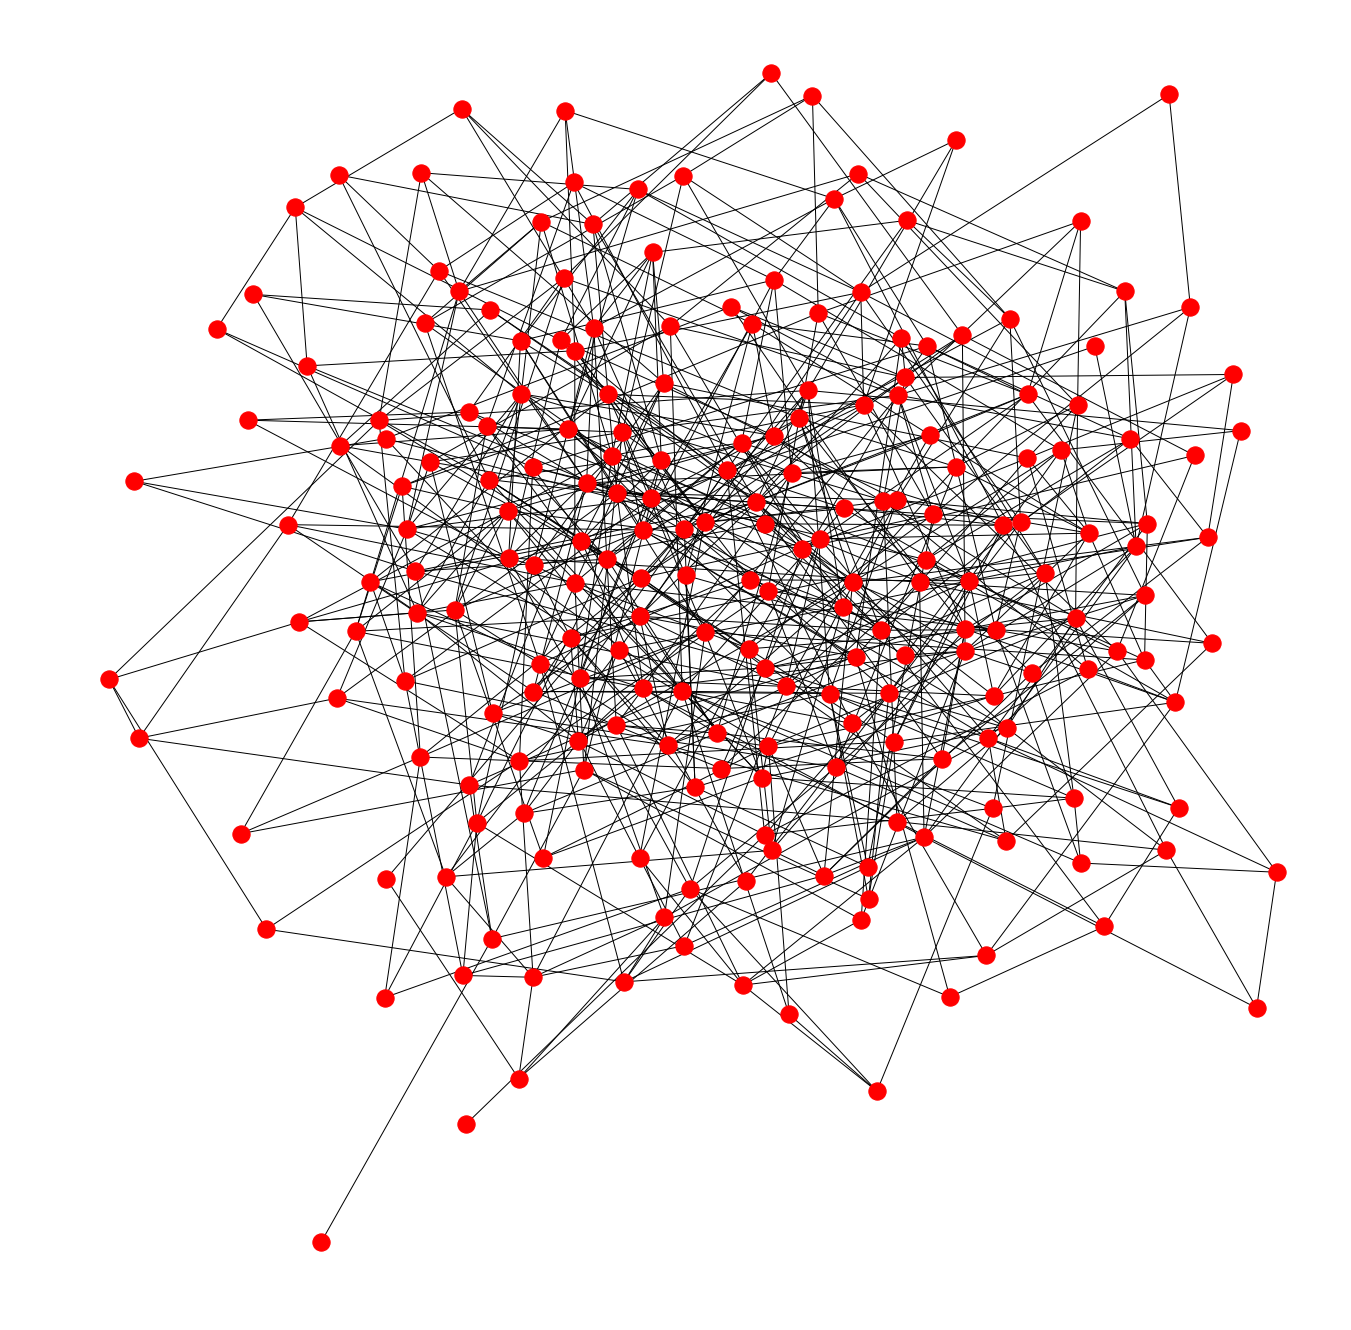

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random


def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g

plt.figure(figsize=(18,18))



n = 219
p = 0.03
G = ER(n, p)

nx.draw_spring(G)

print("avg shortest path {}".format(nx.average_shortest_path_length(G)))
      
clustering_coeffs = nx.clustering(G).values()
average_clustering_coeff = sum(clustering_coeffs)/len(clustering_coeffs)
print("avg cc {}".format(average_clustering_coeff))

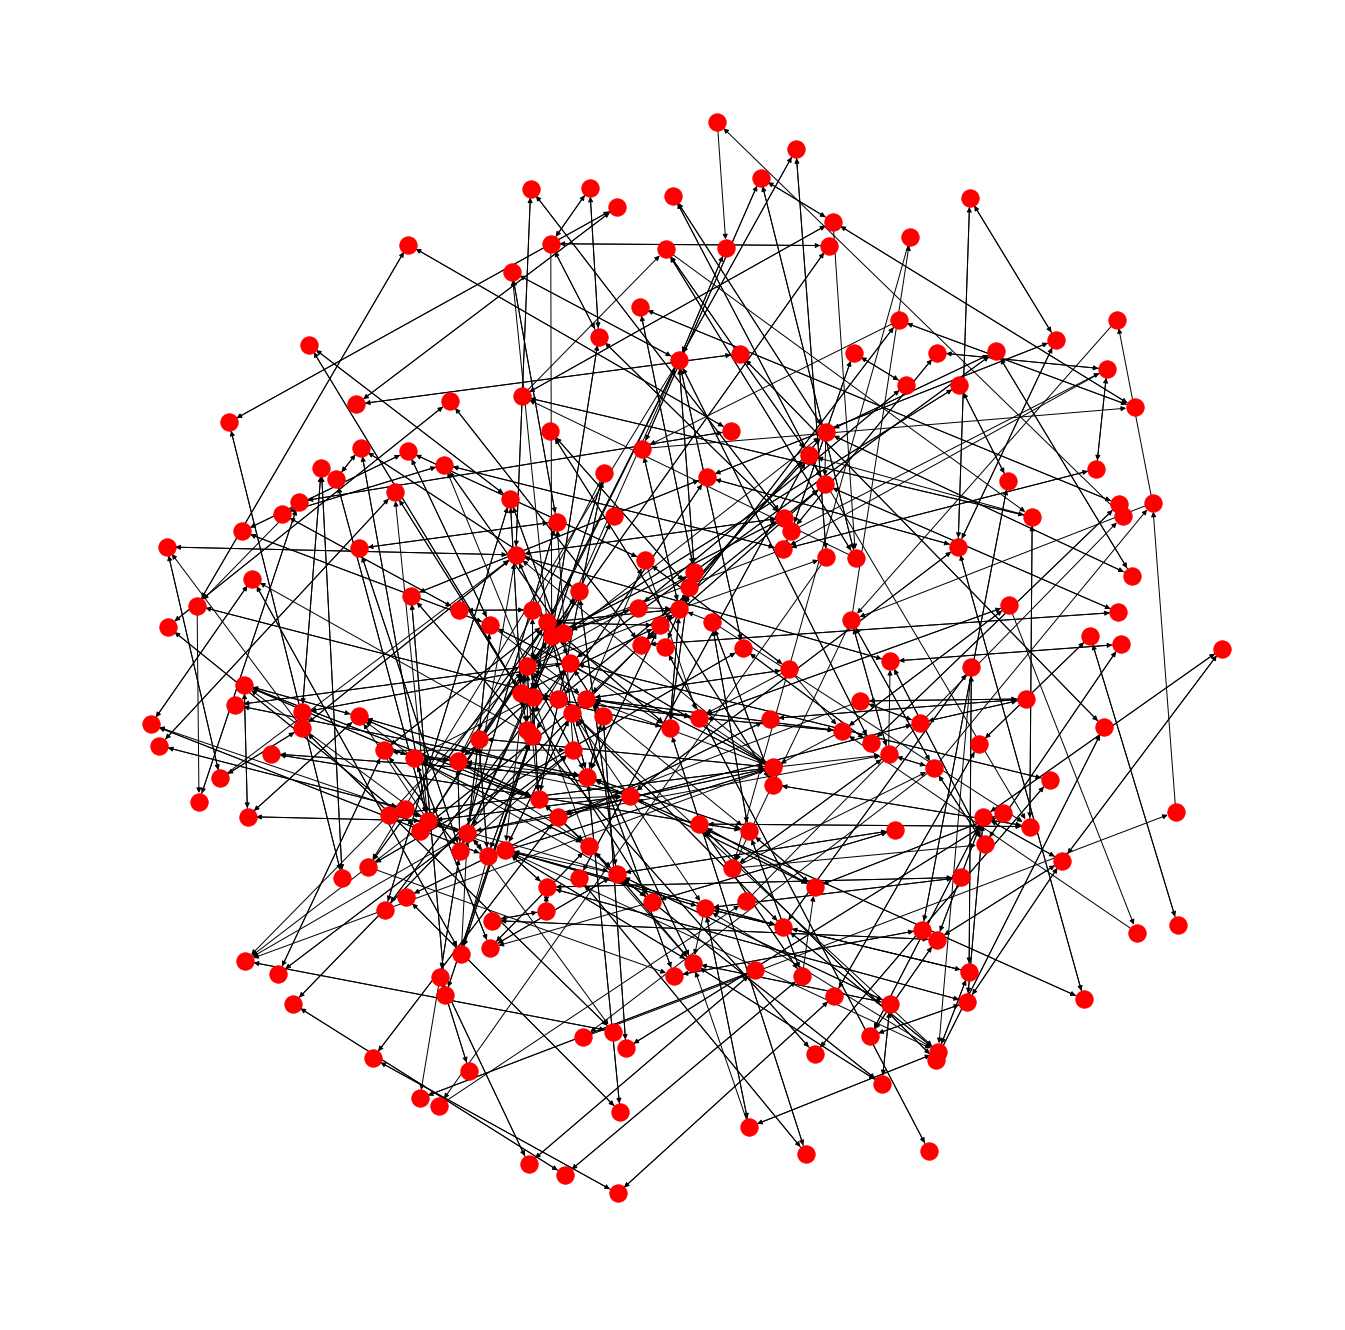

In [90]:
plt.figure(figsize=(18,18))

nx.draw_spring(Gr)

In [91]:
import collections
import matplotlib.pyplot as plt

def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt)

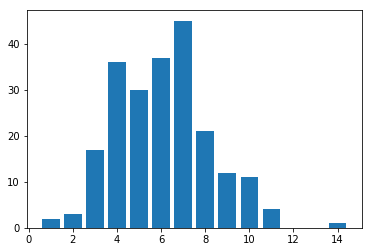

In [92]:
plot_degree_distribution(G)

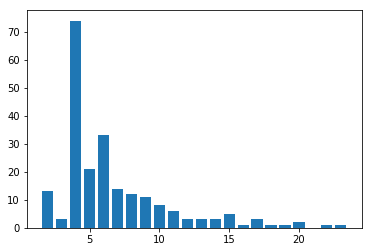

In [93]:
plot_degree_distribution(Gr)

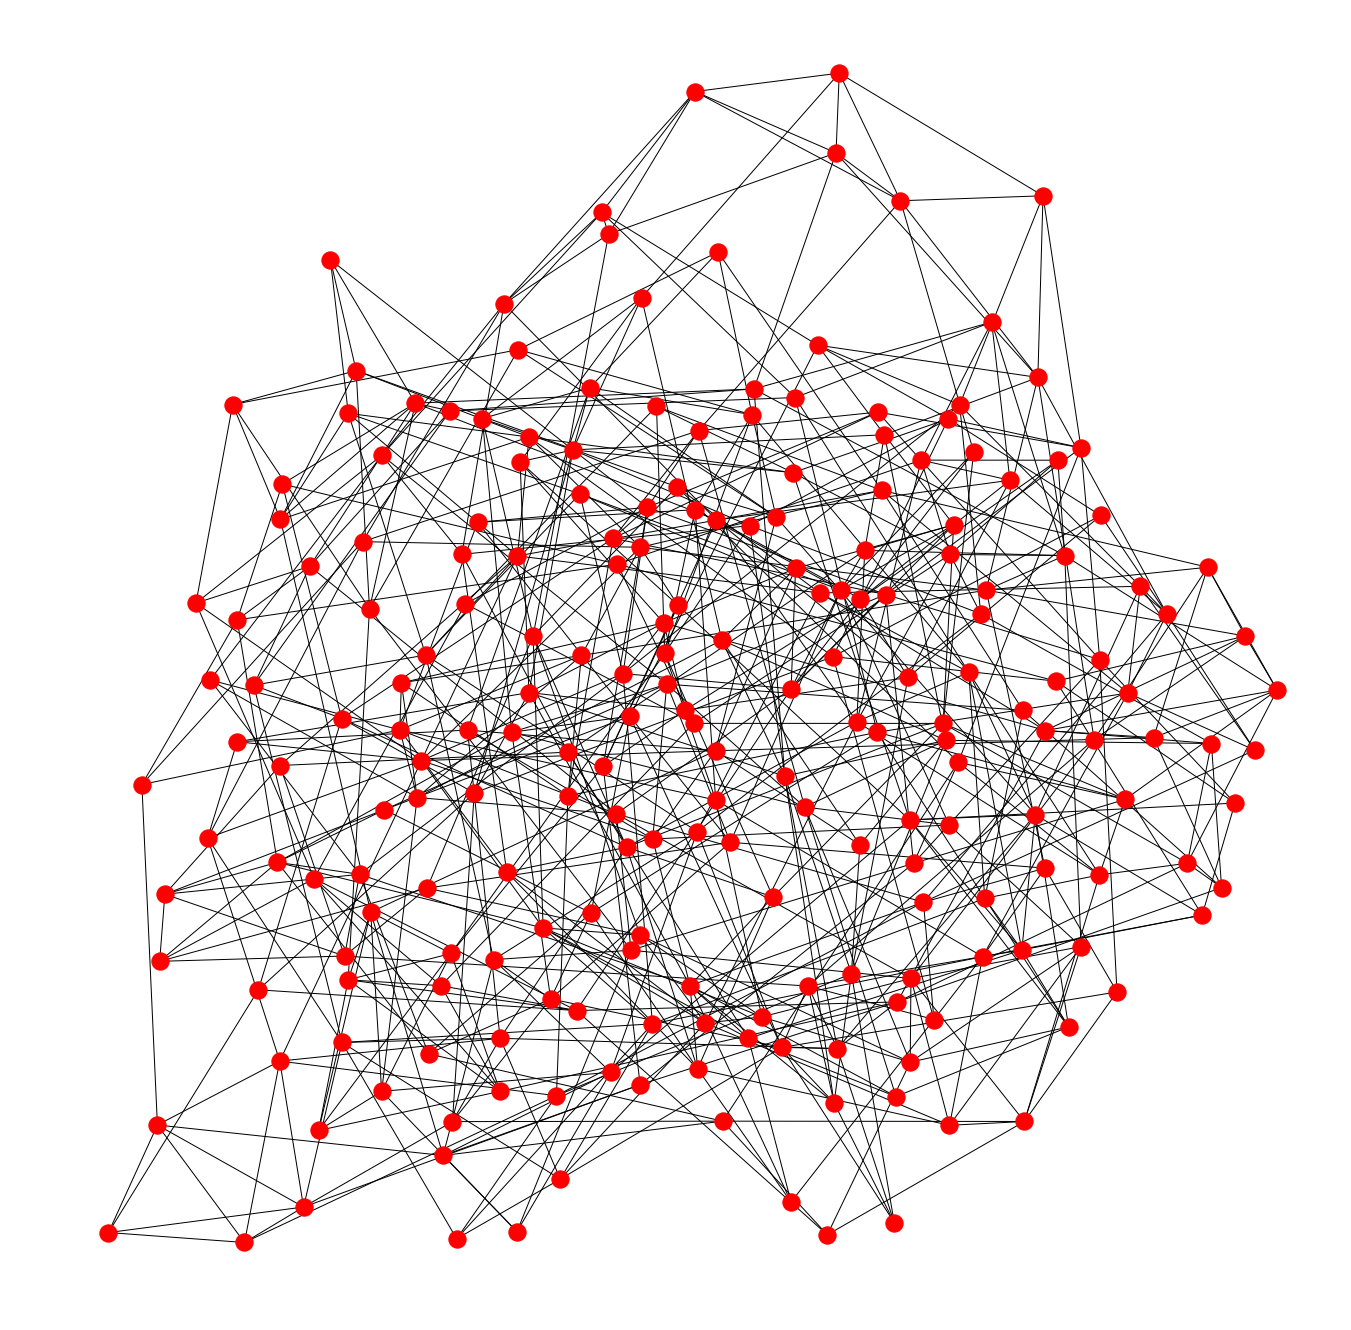

In [101]:
plt.figure(figsize=(18,18))
WSG = nx.watts_strogatz_graph(n, 7, 0.4)
nx.draw(WSG)

In [102]:
nx.average_shortest_path_length(WSG)

3.443466968287881

In [104]:
clustering_coeffs = nx.clustering(WSG).values()
average_clustering_coeff = sum(clustering_coeffs)/len(clustering_coeffs)
average_clustering_coeff

0.16652730830813012

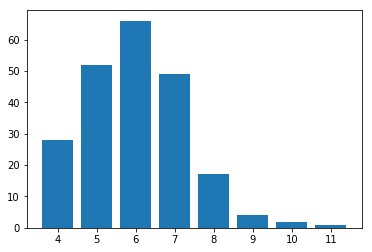

In [105]:
plot_degree_distribution(WSG)

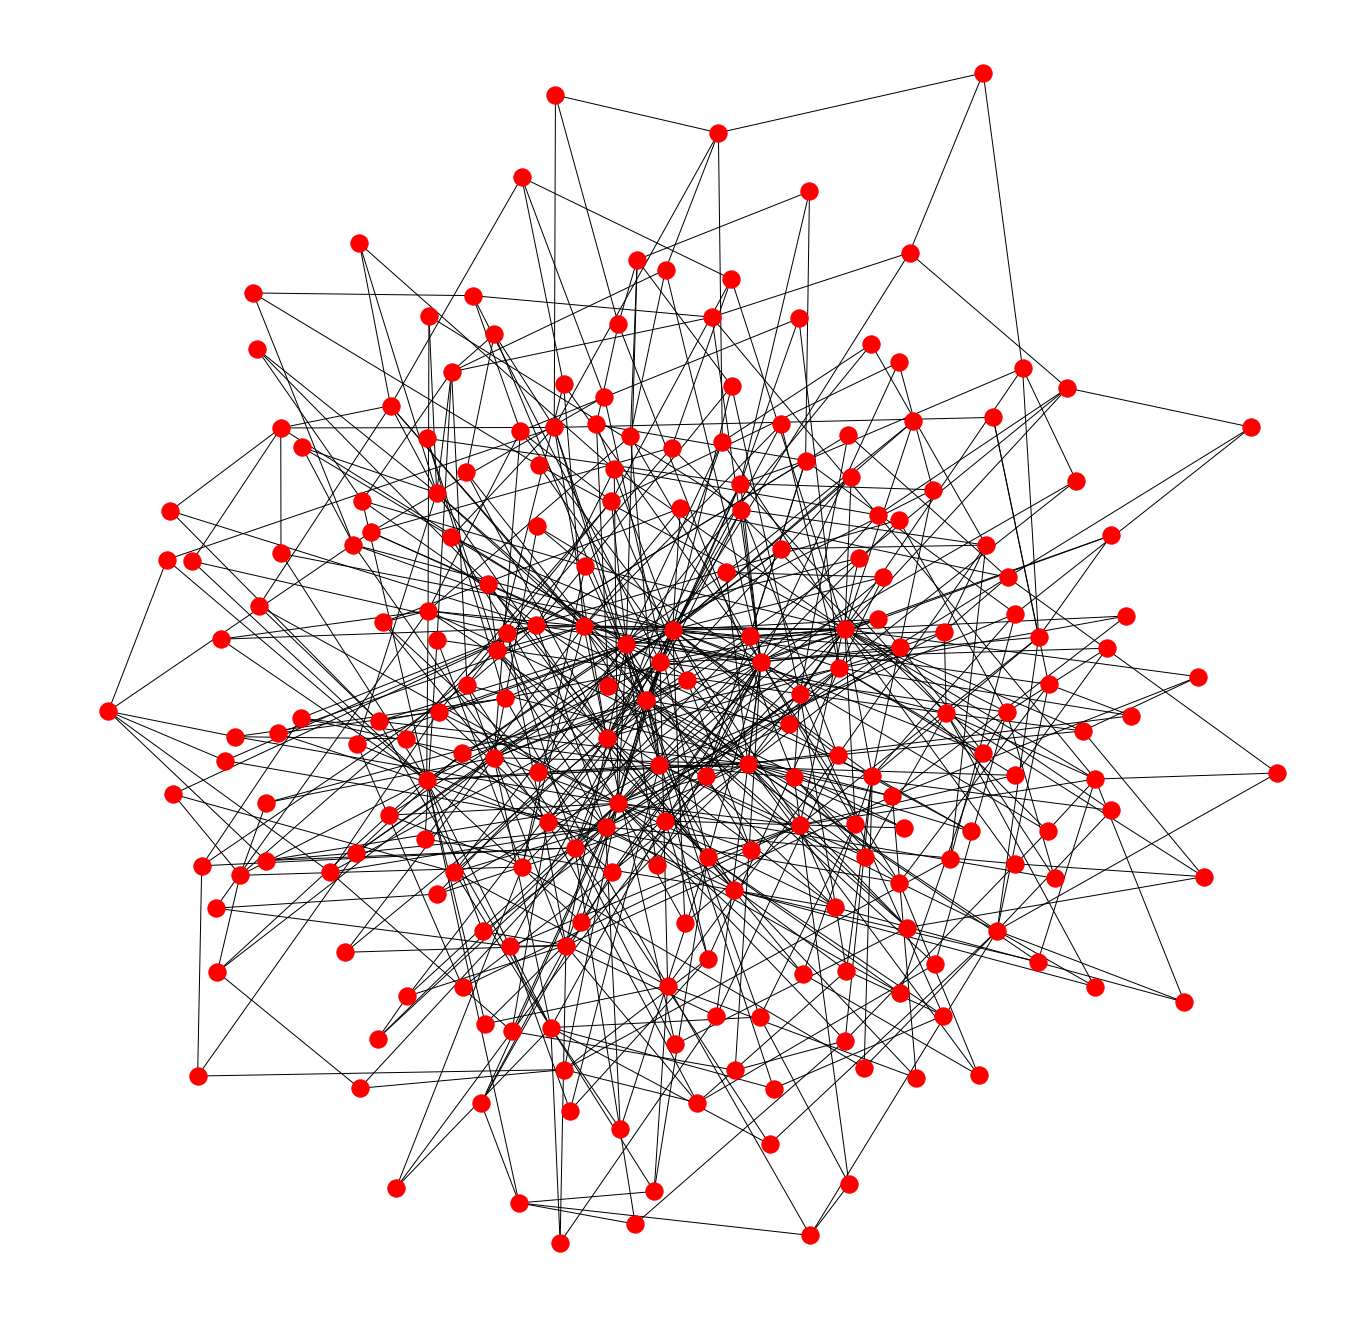

In [107]:
plt.figure(figsize=(18,18))
SC = nx.barabasi_albert_graph(219, 3)
nx.draw_spring(SC)

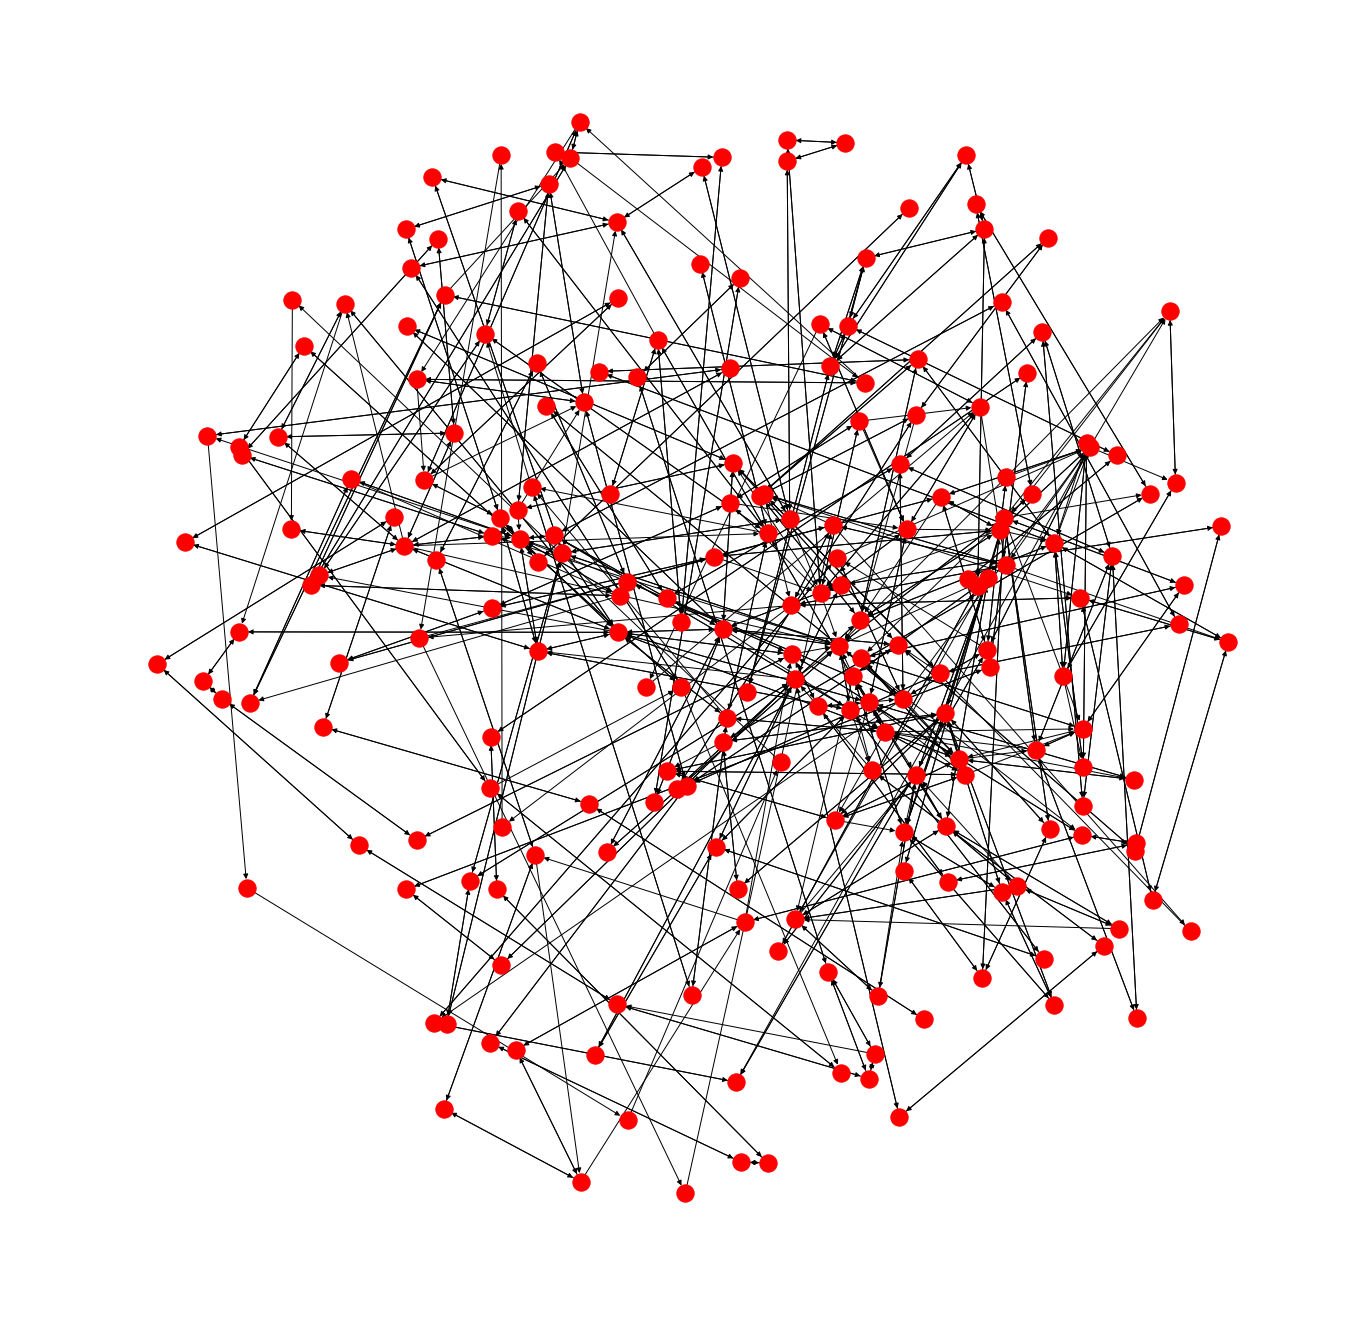

In [109]:
plt.figure(figsize=(18,18))
nx.draw_spring(Gr)

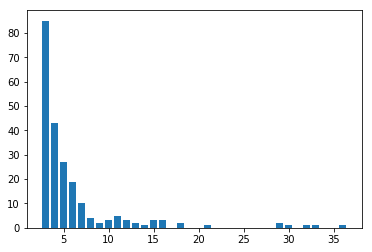

In [110]:
plot_degree_distribution(SC)

In [ ]:
def plot_degree_distribution_log(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    deg, cnt = [math.log(d) for d in deg], [math.log(c) for c in cnt]
    
    fig, ax = plt.subplots()
    plt.scatter(deg, cnt)

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.show()
    
plot_degree_distribution_log(Gr)